In [1]:
import numpy as np
import pandas as pd
import collections


with open('winequality-red.csv', 'r', encoding='utf-8-sig') as f:
  df = pd.read_csv(f)

data = df.to_numpy()

X = data[:, :-1]
y = data[:, -1]
#Print the shapes of X and y
print(X.shape)
print(y.shape)
#list all distinct class labels
print(np.unique(y))
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

(1599, 11)
(1599,)
[3. 4. 5. 6. 7. 8.]


In [2]:
from sklearn.linear_model import LogisticRegression
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(multi_class='auto', max_iter=10000)
clf = logreg.fit(X_train, y_train)
print(y_train.shape)
print(X_train.shape)
#print(clf.coef_, clf.intercept_)

(1279,)
(1279, 11)


In [3]:
# Confusion matrix of the testing dataset
y_hat = clf.predict(X_test)
from sklearn.metrics import confusion_matrix

Cmat = confusion_matrix(y_test, y_hat)
acc = clf.score(X_test,y_test)

print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc*100,'.3f')) + '%')

Confusion Matrix: 
[[  0   0   2   0   0   0]
 [  0   0   8   3   0   0]
 [  0   0 104  31   1   0]
 [  0   0  41  78   9   0]
 [  0   0   2  29   9   0]
 [  0   0   0   2   1   0]]
Accuracy: 59.688%


In [4]:
print(clf.predict_log_proba(X_test))

[[-6.7093776  -3.2645776  -1.63794664 -0.5337606  -2.0005106  -3.11166122]
 [-8.64098559 -3.17130815 -0.59255815 -1.00780082 -3.26602399 -6.32840746]
 [-4.80236331 -2.9639407  -1.41691678 -0.57355    -2.10546891 -4.38971983]
 ...
 [-5.67090823 -4.36170062 -0.37346257 -1.27736596 -4.15501982 -6.91203299]
 [-4.64484217 -2.43325824 -1.25372997 -0.62685229 -2.55184332 -5.29999649]
 [-4.39940076 -2.59812484 -0.70973733 -0.94247408 -3.50662868 -6.28261724]]


In [5]:
#args
print(y_test)
y_test_4 = np.array([1 if y == 4. else 0 for y in y_test])
print(y_test_4)

[6. 5. 6. 5. 7. 6. 5. 5. 6. 5. 5. 6. 7. 5. 7. 5. 5. 5. 6. 6. 6. 6. 5. 6.
 6. 5. 6. 6. 6. 5. 6. 5. 5. 5. 5. 5. 6. 6. 7. 5. 6. 5. 5. 6. 5. 7. 5. 6.
 6. 6. 6. 5. 6. 5. 6. 6. 5. 5. 6. 5. 5. 6. 6. 6. 6. 7. 6. 3. 7. 6. 5. 5.
 6. 7. 5. 6. 5. 5. 4. 6. 6. 5. 6. 6. 6. 7. 6. 8. 6. 5. 7. 5. 5. 6. 7. 6.
 7. 7. 6. 7. 5. 7. 5. 5. 6. 6. 6. 6. 5. 5. 5. 7. 6. 5. 6. 5. 5. 6. 6. 6.
 7. 5. 6. 6. 6. 4. 4. 5. 4. 5. 6. 5. 5. 7. 5. 5. 6. 5. 7. 5. 6. 6. 5. 6.
 6. 5. 7. 5. 7. 6. 4. 5. 6. 5. 6. 6. 6. 6. 5. 5. 5. 5. 5. 6. 6. 5. 5. 6.
 6. 5. 6. 7. 4. 7. 5. 6. 5. 5. 5. 6. 6. 5. 6. 6. 5. 5. 6. 5. 5. 5. 6. 7.
 5. 6. 6. 5. 7. 6. 5. 7. 5. 5. 5. 5. 6. 5. 5. 6. 5. 5. 7. 5. 6. 6. 5. 6.
 5. 5. 6. 5. 5. 5. 6. 5. 6. 7. 6. 7. 7. 6. 3. 5. 5. 6. 5. 6. 5. 6. 5. 5.
 6. 6. 5. 5. 6. 5. 7. 5. 6. 5. 6. 8. 5. 5. 5. 6. 4. 5. 4. 5. 5. 7. 5. 4.
 6. 7. 5. 6. 5. 6. 6. 6. 4. 6. 6. 6. 7. 5. 6. 6. 7. 5. 8. 6. 6. 6. 5. 5.
 6. 5. 7. 6. 6. 5. 7. 5. 5. 7. 6. 6. 5. 7. 6. 6. 5. 6. 5. 5. 7. 5. 4. 6.
 5. 6. 6. 6. 5. 5. 5. 5.]
[0 0 0 0 0 0 0 0 0 0 0 0 

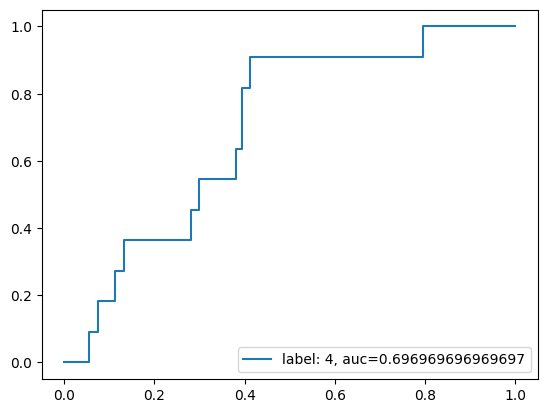

In [6]:
import sklearn.metrics as metrics
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_4, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label="label: 4, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
